<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

5. Number of instances: 569 

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16


In [40]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.impute import SimpleImputer

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [21]:
columns = ['thickness', 'uniform_cell_size', 'uniform_cell_shape', 
          'adhesion', 'single_cell_size', 'bare_nuclei', 'bland_Chromatin',
          'normal_nucleoli', 'mitoses', 'class']

In [22]:
df = pd.read_csv('breast-cancer-wisconsin.data', 
                 names = columns, na_values='?', index_col=0)


In [71]:
# df = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [23]:
df.head()

,thickness,uniform_cell_size,uniform_cell_shape,adhesion,single_cell_size,bare_nuclei,bland_Chromatin,normal_nucleoli,mitoses,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [24]:
df.shape

(699, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   thickness           699 non-null    int64  
 1   uniform_cell_size   699 non-null    int64  
 2   uniform_cell_shape  699 non-null    int64  
 3   adhesion            699 non-null    int64  
 4   single_cell_size    699 non-null    int64  
 5   bare_nuclei         683 non-null    float64
 6   bland_Chromatin     699 non-null    int64  
 7   normal_nucleoli     699 non-null    int64  
 8   mitoses             699 non-null    int64  
 9   class               699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniform_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniform_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [27]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [28]:
df['class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: class, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   thickness           699 non-null    int64  
 1   uniform_cell_size   699 non-null    int64  
 2   uniform_cell_shape  699 non-null    int64  
 3   adhesion            699 non-null    int64  
 4   single_cell_size    699 non-null    int64  
 5   bare_nuclei         683 non-null    float64
 6   bland_Chromatin     699 non-null    int64  
 7   normal_nucleoli     699 non-null    int64  
 8   mitoses             699 non-null    int64  
 9   class               699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


<AxesSubplot:>

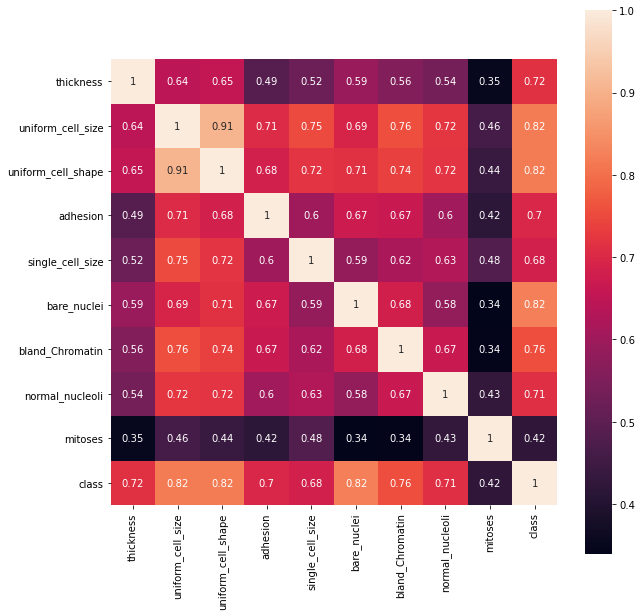

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True)

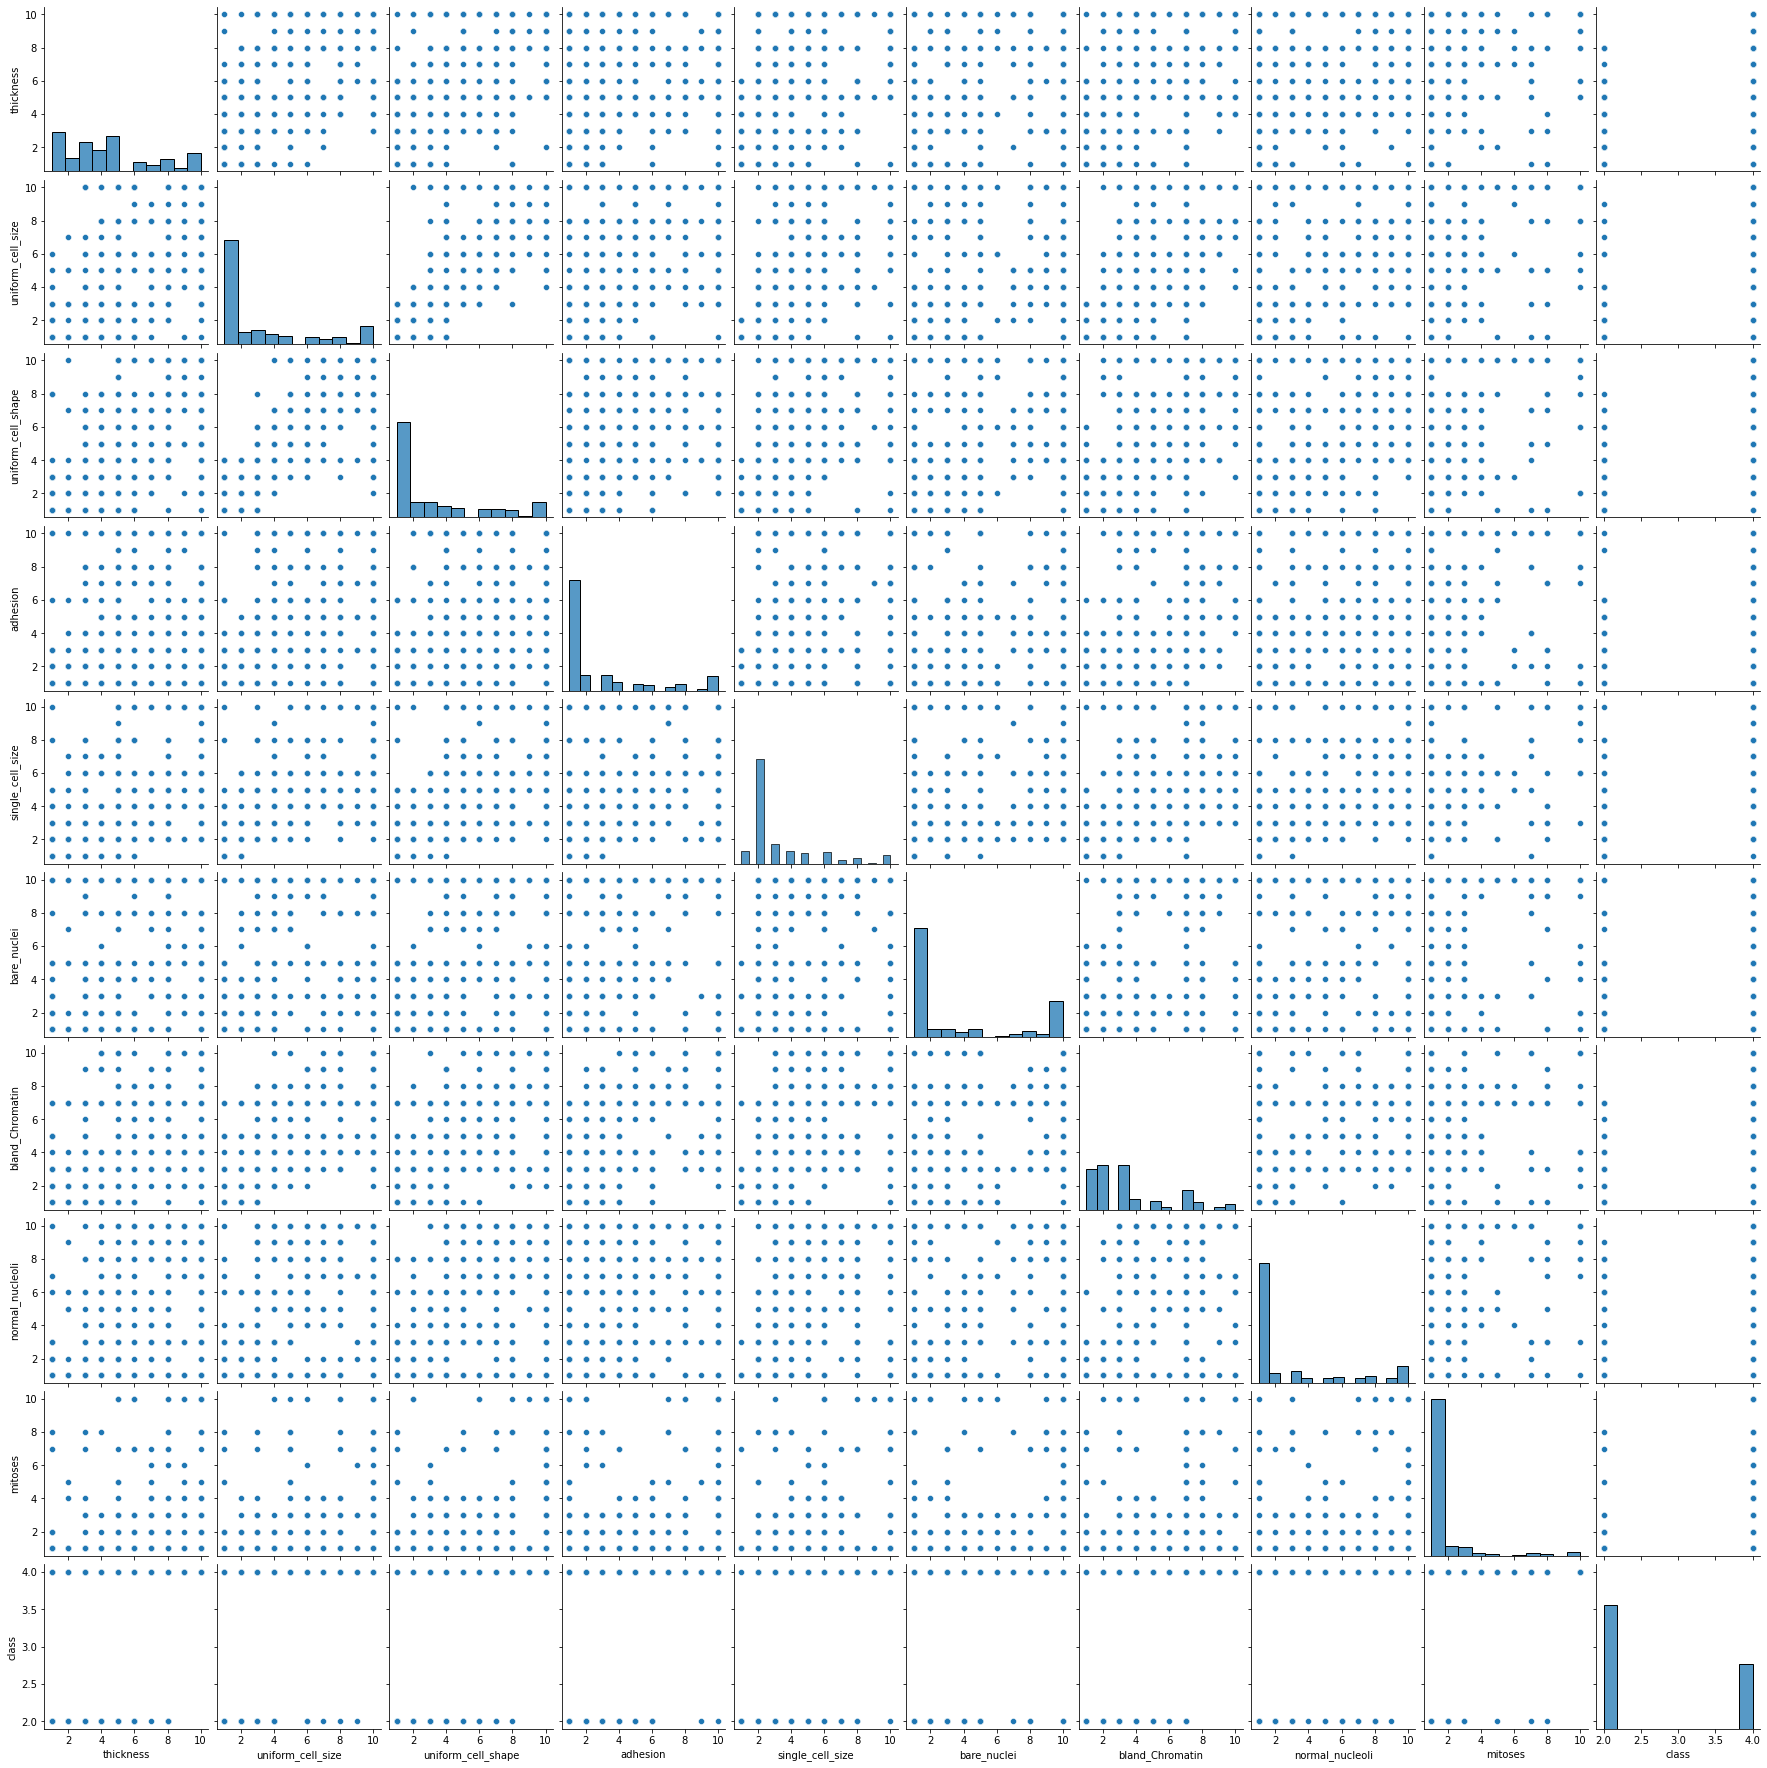

In [32]:
sns.pairplot(df)

/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit k

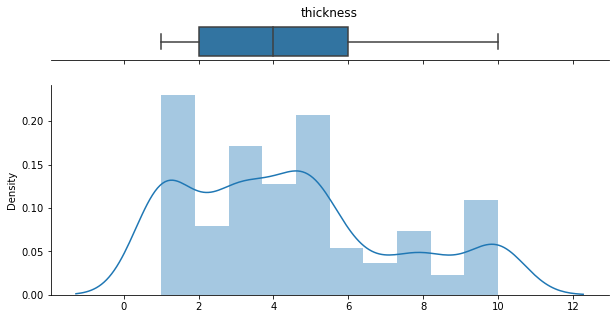

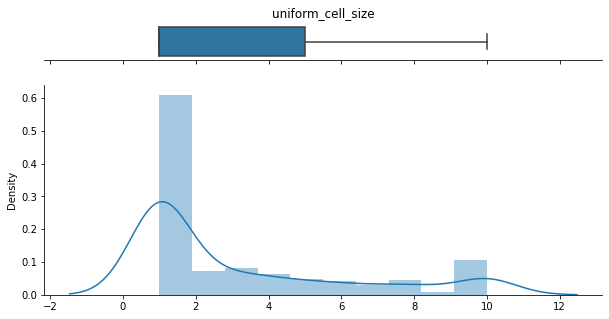

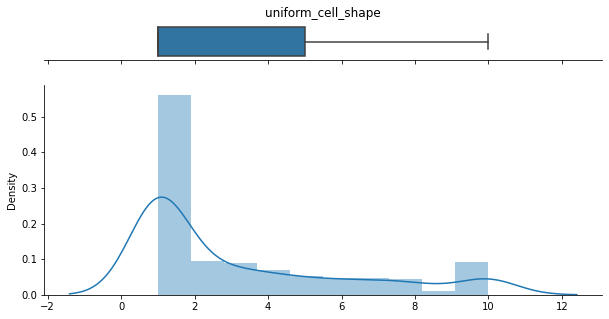

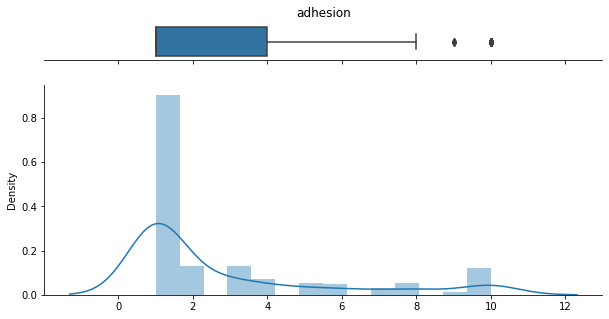

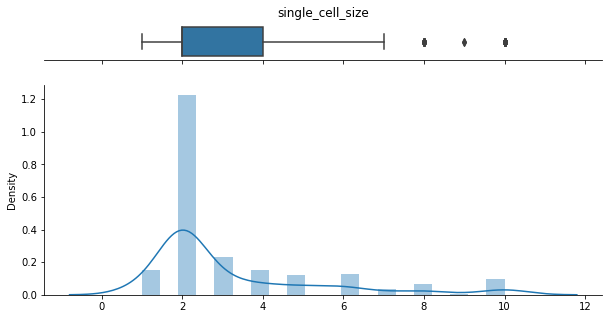

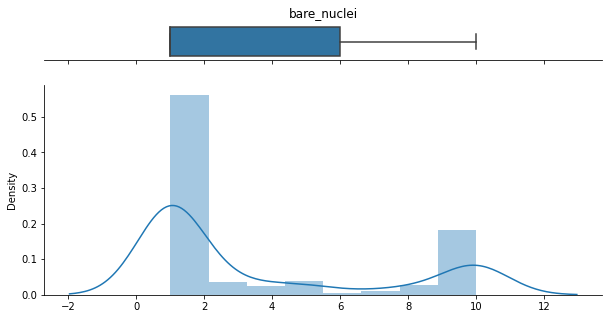

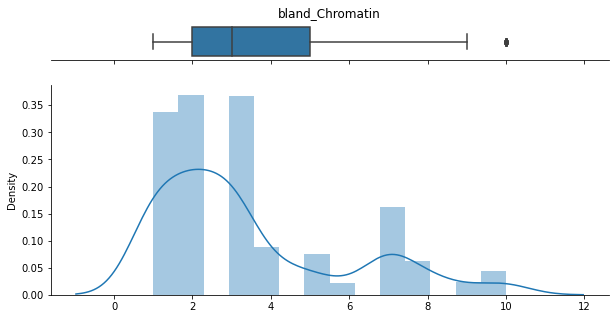

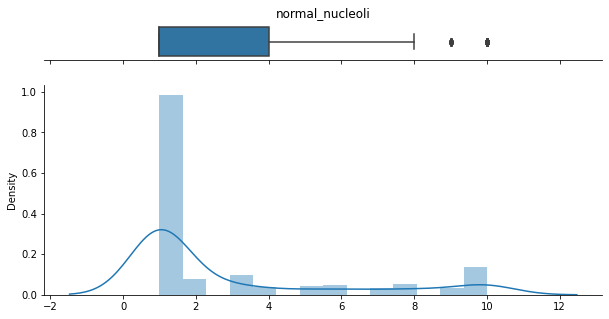

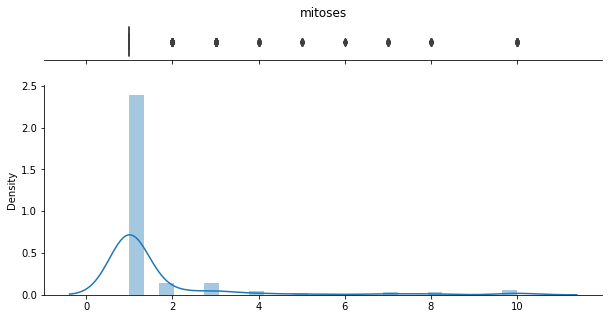

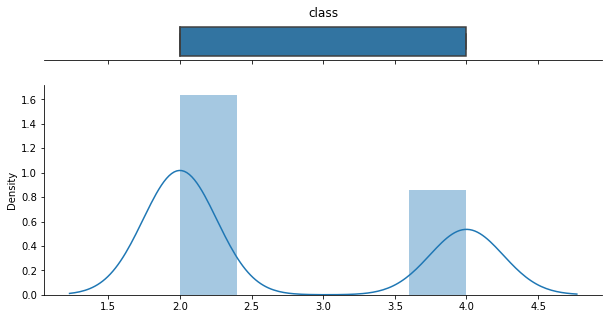

In [33]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

In [ ]:
# values = df.values

# imputer = SimpleImputer(missing_values = np.nan,
#                        strategy = 'median')

# imputedData = imputer.fit_transform(values)

In [ ]:
# scaler = MinMaxScaler(feature_range = (0,1))
# normalizeData = scaler.fit_transform(imputedData)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [34]:
df.isna().sum()

thickness              0
uniform_cell_size      0
uniform_cell_shape     0
adhesion               0
single_cell_size       0
bare_nuclei           16
bland_Chromatin        0
normal_nucleoli        0
mitoses                0
class                  0
dtype: int64

In [35]:
df['bare_nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [56]:
missing = df['bare_nuclei'].isna()
# dropping missing value
df = df.loc[~missing]
df.shape

(683, 10)

In [59]:
X = df.iloc[:, :9]
print(X.shape)

(683, 9)


In [60]:
y = df.iloc[:, 9]
print(y.shape)

(683,)


In [41]:
# values = df.values

# imputer = SimpleImputer(missing_values = np.nan,
#                        strategy = 'median')

# imputedData = imputer.fit_transform(values)

In [ ]:
# scaler = MinMaxScaler(feature_range = (0,1))
# normalizeData = scaler.fit_transform(imputedData)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, 
                                                   random_state = 42)


In [65]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# scaler = MinMaxScaler(feature_range = (0,1))
# normalizeData = scaler.fit_transform(imputedData)


# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [85]:
accuracy_all = []
cvs_all = []

## Support Vector Machines

In [86]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SVC Accuracy: 94.89%
Cross validation score: 96.35% (+/- 5.13%)
Execution time: 0.042395 seconds 



In [87]:
start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

LinearSVC Accuracy: 96.35%
Cross validation score: 96.49% (+/- 3.95%)
Execution time: 0.070843 seconds 



/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jinyang/miniforge3/envs/opencv/lib/python3.8/site-pac

## KNeighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 94.89%
Cross validation score: 96.93% (+/- 4.65%)
Execution time: 0.048734 seconds 



## Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 95.62%
Cross validation score: 95.90% (+/- 3.52%)
Execution time: 0.030028 seconds 



## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 95.62%
Cross validation score: 96.49% (+/- 4.65%)
Execution time: 0.36867 seconds 



## Decision Tree

In [91]:
start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 92.70%
Cross validation score: 94.00% (+/- 3.94%)
Execution time: 0.030056 seconds 



In [93]:
accuracy_all

[0.948905109489051,
 0.9635036496350365,
 0.948905109489051,
 0.9562043795620438,
 0.9562043795620438,
 0.927007299270073]

In [92]:
pd.DataFrame(accuracy_all).shape

(6, 1)

In [94]:
d = {'accuracy_all':accuracy_all, 
     'cvs_all':cvs_all,}

index = ['SVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'DecisionTree']

df = pd.DataFrame(d, index=index)

In [96]:
df

,accuracy_all,cvs_all
SVC,0.948905,0.963461
LinearSVC,0.963504,0.964910
KNeighbors,0.948905,0.969311
GaussianNB,0.956204,0.959049
RandomForest,0.956204,0.964921
DecisionTree,0.927007,0.940028


# Bagging

In [98]:
from sklearn.model_selection import KFold

# decision tree
kfold = KFold(n_splits = 10, random_state = 7, shuffle=True)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

results = cross_val_score(clf, X_train, y_train, cv = kfold)
print(results)

[0.96363636 0.94545455 0.98181818 0.90909091 0.94545455 0.94545455
 0.90740741 0.94444444 0.98148148 0.96296296]


In [99]:
# Use Bagging
num_trees = 100
model1 = BaggingClassifier(base_estimator = clf, n_estimators = num_trees,
                          random_state=7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print(results)

[0.98181818 0.96363636 1.         0.94545455 0.98181818 0.98181818
 0.92592593 0.94444444 0.98148148 0.96296296]


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



